In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("vgsales.csv")
df.set_index('Rank', inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Total_Sales
Rank,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,74.28
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,39.47
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,32.52
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,30.04
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,30.38


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1011
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1000 non-null   object 
 1   Platform     1000 non-null   object 
 2   Year         1000 non-null   int64  
 3   Genre        1000 non-null   object 
 4   Publisher    1000 non-null   object 
 5   NA_Sales     1000 non-null   float64
 6   EU_Sales     1000 non-null   float64
 7   JP_Sales     1000 non-null   float64
 8   Total_Sales  1000 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 78.1+ KB


In [4]:
df = df.sort_values('Year', ascending=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Total_Sales
Rank,,,,,,,,,
545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,2.73
259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,4.26
768,Demon Attack,2600,1981,Shooter,Imagic,1.99,0.12,0.00,2.11
866,E.T.: The Extra Terrestrial,2600,1981,Action,Atari,1.84,0.11,0.00,1.95
736,Frogger,2600,1981,Action,Parker Bros.,2.06,0.12,0.00,2.18
...,...,...,...,...,...,...,...,...,...
352,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.28,1.61,0.15,3.04
847,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,1.82
272,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,3.55


# Analisis 1: Total Penjualan Game Sebelum vs. Setelah Tahun 2000

Untuk melihat bagaimana evolusi video games dan perubahan model bisnis memengaruhi total penjualan game sebelum dan setelah tahun 2000, akan membutuhkan kolom baru yaitu "Category" yang akan membedakan game sebelum dan setelah tahun 2000.

In [5]:
group_years = [1979, 1999, 2016]
years_label = ['Pre-2000 Games', 'Post-2000 Games']

df['Category'] = pd.cut(df['Year'], bins = group_years, labels = years_label)

Setelah membuat kolom "Category" Year, buat tabel baru untuk visualisasi perbandingan game sebelum dan setelah tahun 2000

In [6]:
sales_category = df.groupby('Category').agg(
    Total_Sales = ('Total_Sales', 'sum'),
    Total_Games = ("Category", 'count'),
    Total_Years = ("Year", "nunique")
).reset_index()

sales_category

C:\Users\rafli\AppData\Local\Temp\ipykernel_26200\373412859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_category = df.groupby('Category').agg(


,Category,Total_Sales,Total_Games,Total_Years
0,Pre-2000 Games,910.16,208,20
1,Post-2000 Games,2967.84,792,17


In [7]:
pre_sales, post_sales = sales_category['Total_Sales'].values

In [8]:
selisih = post_sales - pre_sales
selisih

np.float64(2057.6800000000003)

## Visualisasi Analisis 1.1 (Perbandingan Rata-rata total sales per tahun)

Rata rata Total Sales per Tahun sebelum 2000 adalah 45.507999999999996
Rata rata Total Sales per Tahun sesudah 2000 adalah 174.57882352941178


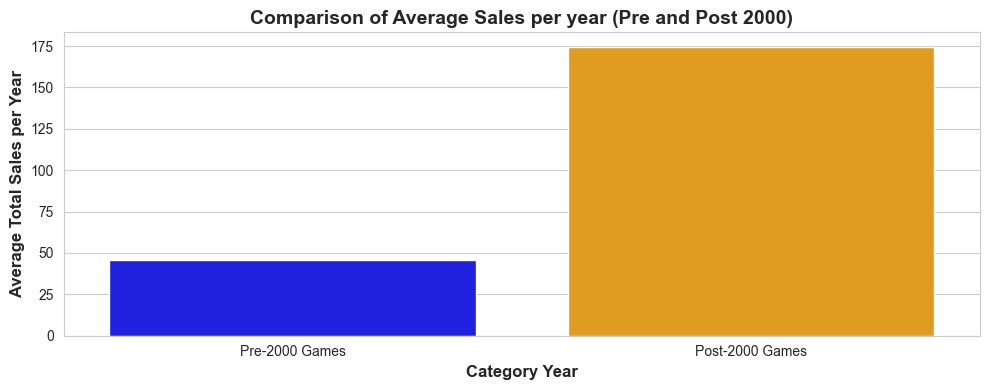

In [9]:
year_per_pre_games = pre_sales / 20
year_per_post_games = post_sales / 17

print("Rata rata Total Sales per Tahun sebelum 2000 adalah", year_per_pre_games)
print("Rata rata Total Sales per Tahun sesudah 2000 adalah", year_per_post_games)


# Visualisasi perbandingan
category = ['Pre-2000 Games', 'Post-2000 Games']
avg_sales_per_year = [45.51, 174.58]

plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.barplot(x = category, 
            y = avg_sales_per_year,
            palette = ['blue', 'orange'],
            hue = category)

plt.title("Comparison of Average Sales per year (Pre and Post 2000)", fontsize = 14, fontweight = 'bold')
plt.xlabel("Category Year", fontsize = 12, fontweight = 'bold')
plt.ylabel("Average Total Sales per Year", fontsize = 12, fontweight = 'bold')

plt.tight_layout()

Dari temuan ini, kita dapat melihat bahwa rata-rata penjualan per tahun untuk game yang dirilis setelah tahun 2000 mencapai **174.58**, jauh lebih tinggi dibandingkan dengan game yang dirilis sebelum tahun 2000, yang hanya memiliki rata-rata **45.51**. Untuk memahami faktor yang mempengaruhi perbedaan ini, mari kita lihat perbandingan total penjualan dan jumlah game yang dirilis pada kedua kategori tersebut.

## Visualisasi Analisis 1.2 (Perbandingan Total Penjualan dan Jumlah Game sebelum dan sesudah tahun 2000)

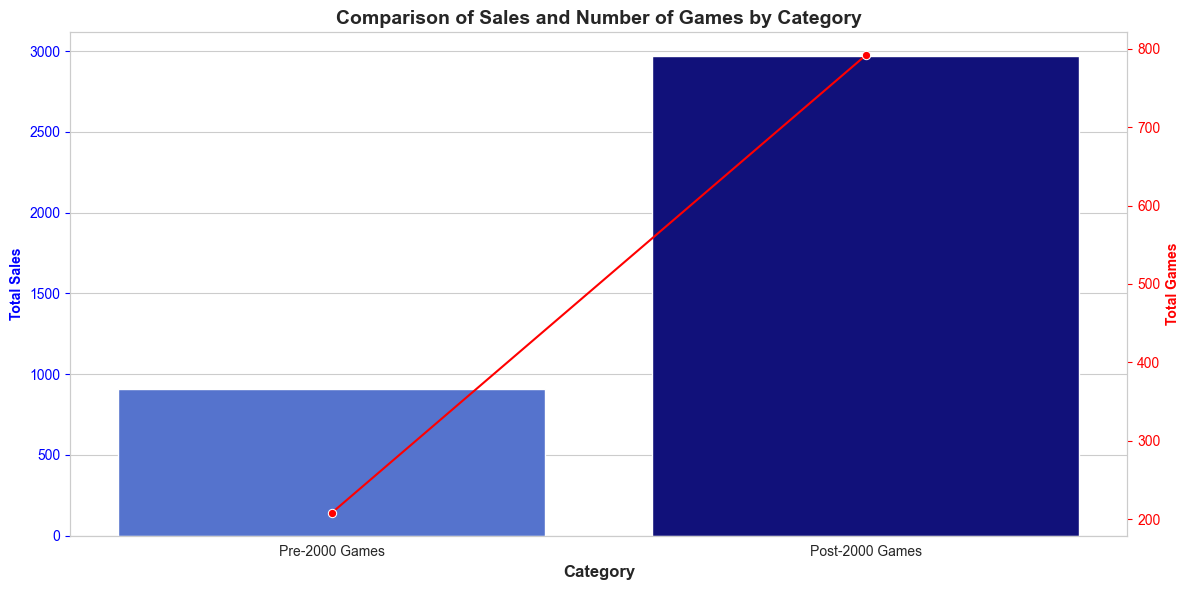

In [10]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1 = sns.barplot(data=sales_category,
            x = 'Category',
            y = 'Total_Sales',
            palette = ['royalblue', 'darkblue'],
            hue = 'Category',
            )

ax2 = plt.twinx()

ax2 = sns.lineplot(data=sales_category,
             x = 'Category',
             y = 'Total_Games',
             marker = 'o',
             color = 'red',
             )

plt.grid(False) # Menghapus grid yang menghalangi bar chart
plt.title("Comparison of Sales and Number of Games by Category", fontweight = 'bold', fontsize = 14) # Membuat judul chart
ax1.set_xlabel("Category", fontweight = 'bold', fontsize = 12) # Membuat label x  di ax1 dan menamai "Category"
ax1.set_ylabel("Total Sales", color="blue", fontweight="bold") # Membuat label y di ax1 dan menamai "Total Sales"
ax2.set_ylabel("Total Games", color="red", fontweight="bold") # Membuat label y di ax2 dan menamai "Total Games"
ax1.tick_params(axis = 'y', colors = 'blue') # custom warna pada nomor label
ax2.tick_params(axis= 'y', colors = 'red') # custom warna pada nomor label

plt.tight_layout()

Dari Bar chart diatas, kita bisa lihat bahwa Total Sales dan Total Games yang dikeluarkan oleh Games yang dirilis setelah tahun 2000 jauh lebih tinggi dibandingkan dengan Games yang dirilis sebelum tahun 2000. Padahal Kategori Post-2000 Games dengan Pre-2000 Games hanya berbeda 3 tahun. Penemuan ini menjadikan munculnya beberapa pertanyaan mengenai faktor-faktor yang menyebabkan lonjakan drastis ini. Apakah ada platform atau publisher baru yang memiliki kontribusi dominan dalam peningkatan ini?  

# Analisis 2: Top 10 Platform Terbesar Periode 1980-2016

In [11]:
df_post = df[df['Category'] == 'Post-2000 Games']
post_platform = df_post.groupby('Platform')['Total_Sales'].sum().reset_index()
post_platform = post_platform.sort_values('Total_Sales', ascending=False)
post_platform.head()

,Platform,Total_Sales
16,X360,496.11
14,Wii,471.89
9,PS2,471.48
10,PS3,404.22
2,DS,345.49


In [12]:
df_pre = df[df['Category'] == 'Pre-2000 Games']
pre_platform = df_pre.groupby('Platform')['Total_Sales'].sum().reset_index()
pre_platform = pre_platform.sort_values('Total_Sales', ascending=False)
pre_platform.head()

,Platform,Total_Sales
7,PS,238.44
2,GB,187.80
5,NES,181.94
9,SNES,115.32
4,N64,95.44


In [13]:
new_platforms = post_platform[~post_platform["Platform"].isin(pre_platform["Platform"])]

new_platforms

,Platform,Total_Sales
16,X360,496.11
14,Wii,471.89
9,PS2,471.48
10,PS3,404.22
2,DS,345.49
11,PS4,151.83
0,3DS,130.90
4,GBA,99.06
18,XOne,63.02
12,PSP,57.57


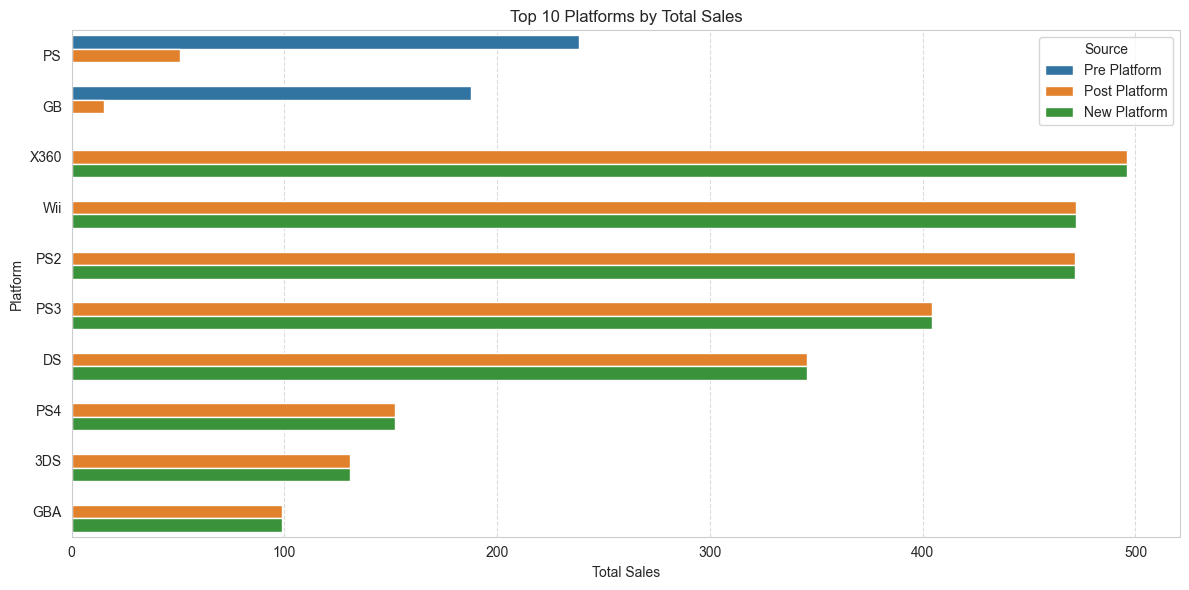

In [14]:
pre_platform = pre_platform.copy()
post_platform = post_platform.copy()
new_platforms = new_platforms.copy()

pre_platform['Source'] = 'Pre Platform'
post_platform['Source'] = 'Post Platform'
new_platforms['Source'] = 'New Platform'

combined_platform = pd.concat([pre_platform, post_platform, new_platforms])

top_platforms = combined_platform.groupby('Platform')['Total_Sales'].sum().nlargest(10).index

filtered_data = combined_platform[combined_platform['Platform'].isin(top_platforms)].copy()

plt.figure(figsize=(12,6))
sns.barplot(data=filtered_data, y='Platform', x='Total_Sales', hue='Source')

plt.ylabel("Platform")
plt.xlabel("Total Sales")
plt.title("Top 10 Platforms by Total Sales")
plt.legend(title="Source")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari chart diatas, dapat dilihat bahwa Platform yang dirilis setelah tahun 2000 **seperti X360, Wii, dan PS2** mendominasi top 10 Platform berdasarkan Total Penjualan. **PS2, dan PS3** berhasil melanjutkan tren yang positif dari **PS1**, tetapi **PS4** masih kalah dengan PS1 di periode sebelum tahun 2000. Penggemar game tampaknya lebih tertarik bermain di **X360** atau platform sekelas **PS4** daripada menggunakan PS4 itu sendiri. Kesimpulannya adalah Platform terbaru dapat memikat para penggemar game untuk memainkan berbagai jenis games di platform terbaru, baik itu dari segi gameplay nya, atau bisa bermain dengan orang lain(multiplayer)

# Analisis 3: Top 10 Publisher Terbesar periode 1980-2016

In [15]:
# Publisher setelah tahun 2000

post_publisher = df_post.groupby('Publisher')['Total_Sales'].sum().reset_index()
post_publisher = post_publisher.sort_values('Total_Sales', ascending=False)

post_publisher.head(10)

,Publisher,Total_Sales
22,Nintendo,905.96
9,Electronic Arts,391.11
2,Activision,320.77
30,Take-Two Interactive,210.84
25,Sony Computer Entertainment,205.07
17,Microsoft Game Studios,165.09
32,Ubisoft,164.44
29,THQ,68.69
5,Capcom,59.25
12,Konami Digital Entertainment,58.78


In [16]:
# Publisher sebelum tahun 2000

pre_publisher = df_pre.groupby('Publisher')['Total_Sales'].sum().reset_index()
pre_publisher = pre_publisher.sort_values('Total_Sales', ascending=False)

pre_publisher.head(10)

,Publisher,Total_Sales
22,Nintendo,519.02
27,Sony Computer Entertainment,106.06
9,Eidos Interactive,27.85
29,SquareSoft,23.76
34,Virgin Interactive,21.11
26,Sega,20.17
10,Electronic Arts,18.73
3,Activision,17.07
5,Atari,16.67
11,Enix Corporation,15.51


In [17]:
# Publisher baru di tahun > 2000

new_publisher = post_publisher[~post_publisher["Publisher"].isin(pre_publisher["Publisher"])]

new_publisher.head(10)

,Publisher,Total_Sales
27,Square Enix,48.14
4,Bethesda Softworks,42.20
38,Warner Bros. Interactive Entertainment,41.22
0,505 Games,19.32
18,Midway Games,13.30
26,Sony Computer Entertainment Europe,13.28
23,RedOctane,6.75
33,Universal Interactive,6.29
13,Level 5,4.96
6,Deep Silver,4.17


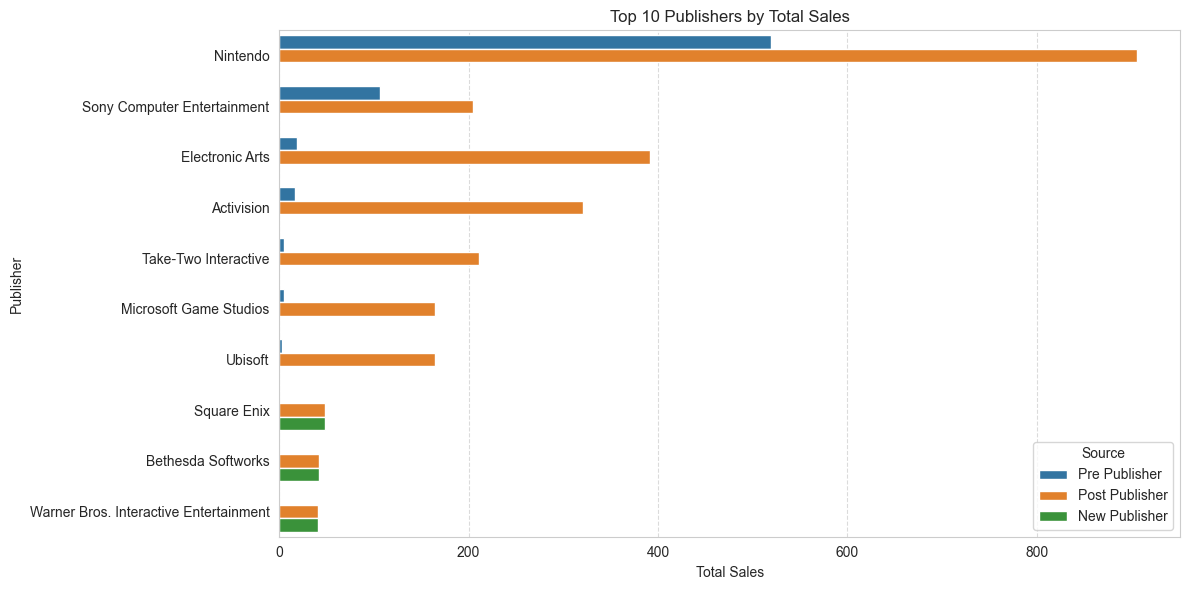

In [18]:
pre_publisher = pre_publisher.copy()
post_publisher = post_publisher.copy()
new_publisher = new_publisher.copy()

pre_publisher['Source'] = 'Pre Publisher'
post_publisher['Source'] = 'Post Publisher'
new_publisher['Source'] = 'New Publisher'

combined_publisher = pd.concat([pre_publisher, post_publisher, new_publisher])

top_publishers = combined_publisher.groupby('Publisher')['Total_Sales'].sum().nlargest(10).index

filtered_data = combined_publisher[combined_publisher['Publisher'].isin(top_publishers)]

plt.figure(figsize=(12,6))
sns.barplot(data=filtered_data, y='Publisher', x='Total_Sales', hue='Source')

plt.ylabel("Publisher")
plt.xlabel("Total Sales")
plt.title("Top 10 Publishers by Total Sales")
plt.legend(title="Source")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Chart di atas menunjukkan bahwa **Nintendo** mendominasi penjualan game dari tahun 1980 hingga 2016, membuktikan kemampuannya dalam menciptakan game yang terus relevan dengan perkembangan zaman. Sementara itu, publisher besar lainnya seperti **Sony Computer Entertainment, Electronic Arts, dan Activision** juga mencatat angka penjualan yang tinggi, dengan kontribusi utama dari periode **Post Publisher**. Beberapa publisher baru yang muncul setelah tahun 2000, seperti **Square Enix, Bethesda Softworks, dan Warner Bros**, berhasil masuk ke dalam daftar top publisher. Namun, pertumbuhan mereka masih belum sebesar Nintendo dan Sony, menunjukkan bahwa industri game tetap didominasi oleh pemain lama yang telah mengakar kuat di pasar.

# Analisis 4: Analisis Penjualan Nintendo Periode 1980-2016

Analisis ini akan melihat bagaimana Tren penjualan Game publisher Nintendo dari tahun ke tahun

In [19]:
top_publisher = df.groupby('Publisher')['Total_Sales'].sum().reset_index()
top_publisher.sort_values('Total_Sales', ascending=False, inplace=True)
top_publisher.head()

,Publisher,Total_Sales
32,Nintendo,1424.98
13,Electronic Arts,409.84
4,Activision,337.84
38,Sony Computer Entertainment,311.13
44,Take-Two Interactive,216.22


In [20]:
nintendo = df[df['Publisher'] == 'Nintendo']
nintendo = nintendo.groupby('Year')['Total_Sales'].sum().reset_index()
nintendo.sort_values('Total_Sales', ascending=False, inplace=True)
nintendo.head()

,Year,Total_Sales
23,2006,171.84
26,2009,108.34
22,2005,97.27
24,2007,83.92
25,2008,74.33


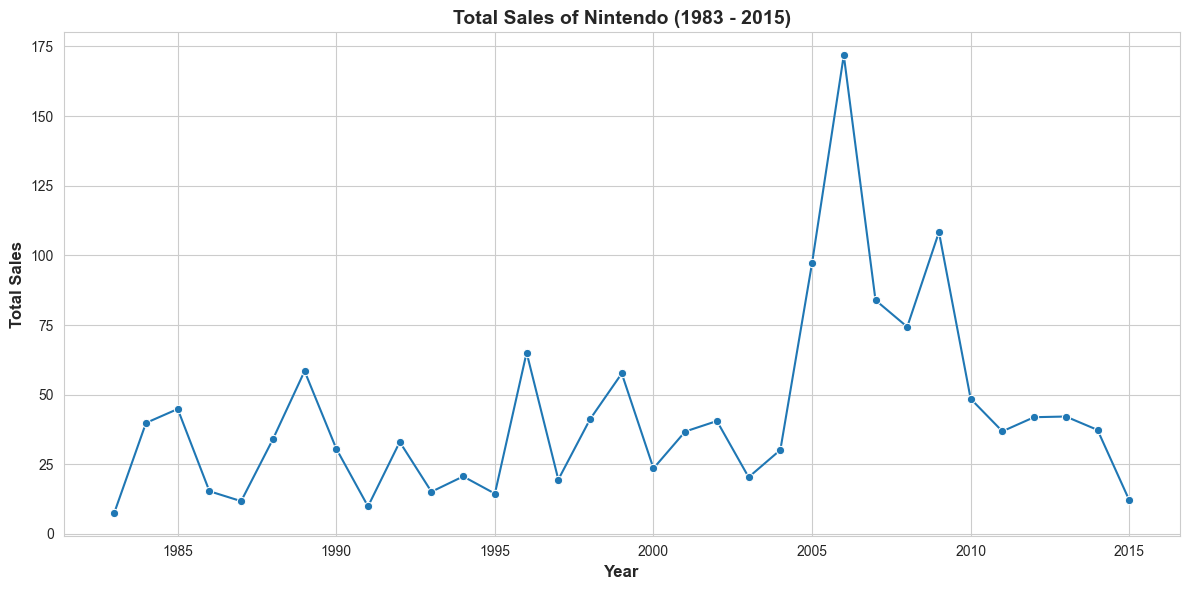

In [21]:
plt.figure(figsize=(12,6))

sns.lineplot(data = nintendo,
             x = 'Year',
             y = 'Total_Sales',
             marker = 'o')

plt.title("Total Sales of Nintendo (1983 - 2015)", fontsize = 14, fontweight = 'bold')
plt.xlabel("Year", fontsize = 12, fontweight = 'bold')
plt.ylabel("Total Sales", fontsize = 12, fontweight = 'bold')

plt.tight_layout()

Berdasarkan line chart di atas, tahun 2006 menjadi puncak penjualan bagi publisher Nintendo, dengan lonjakan signifikan dibanding tahun-tahun sebelumnya. Setelah mencapai titik tertinggi, penjualan mulai menurun, kemungkinan dipengaruhi oleh perubahan tren pasar, siklus hidup produk, serta munculnya persaingan dari platform lain. Meskipun begitu, tahun tersebut tetap menjadi momen penting dalam sejarah Nintendo, menandakan periode di mana mereka berhasil menarik perhatian pasar secara besar-besaran.

# Analisis 5: Game Publisher Nintendo pada Tahun 2006  

Untuk memahami alasan di balik pencapaian penjualan terbesar Nintendo pada game yang dirilis pada tahun 2006, analisis ini akan menelusuri game apa saja yang berkontribusi terhadap lonjakan tersebut.

In [22]:
nintendo_2006 = df[(df['Publisher'] == 'Nintendo') & (df['Year'] == 2006)]
nintendo_2006 = nintendo_2006.sort_values('Total_Sales', ascending=False)

nintendo_2006.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Total_Sales,Category
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,74.28,Post-2000 Games
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,27.11,Post-2000 Games
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,26.16,Post-2000 Games
21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,16.98,Post-2000 Games
101,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,6.62,Post-2000 Games


C:\Users\rafli\AppData\Local\Temp\ipykernel_26200\3668424123.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(nintendo_2006))


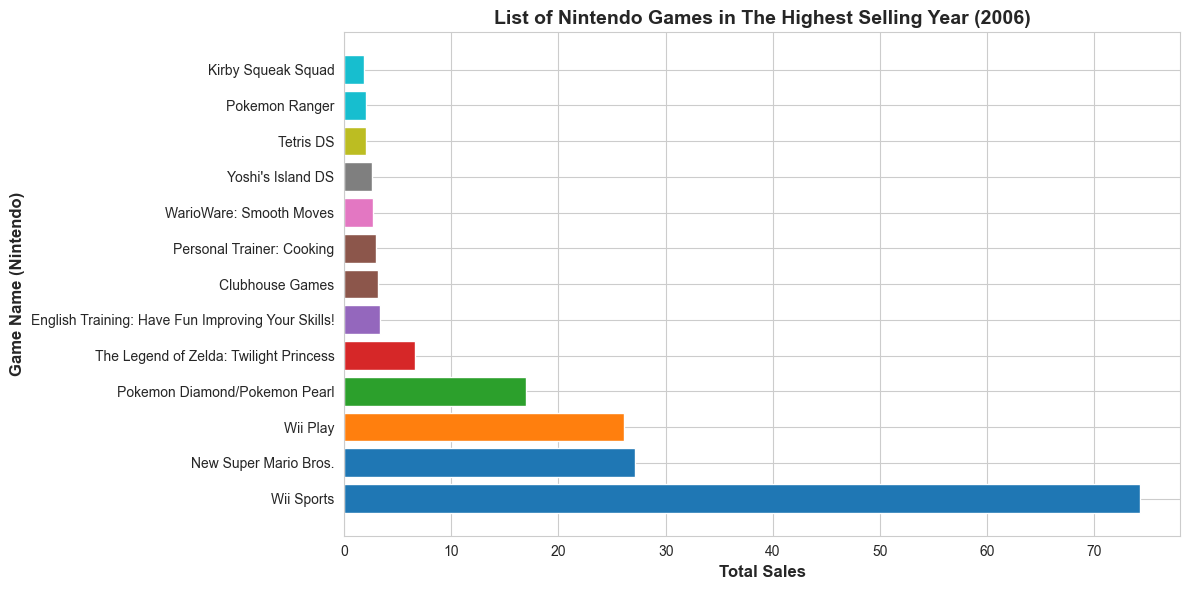

In [23]:
plt.figure(figsize=(12,6))

colors = plt.cm.get_cmap('tab10', len(nintendo_2006))

plt.barh(nintendo_2006['Name'], nintendo_2006['Total_Sales'], color=[colors(i) for i in range(len(nintendo_2006))])

plt.title("List of Nintendo Games in The Highest Selling Year (2006)", fontsize = 14, fontweight = 'bold')
plt.xlabel("Total Sales", fontsize = 12, fontweight = 'bold')
plt.ylabel("Game Name (Nintendo)", fontsize = 12, fontweight = 'bold')
plt.tight_layout()

**Wii Sports** menjadi game terlaris dengan penjualan 74.28 juta unit, jauh melampaui game nintendo yang kedua yaitu **New Super Mario Bros**. **Wii Play** masing-masing terjual sebanyak 26.16 juta unit. **Pokemon Diamond/Pearl** juga menunjukkan performa yang baik dengan penjualan 16.98 juta unit, diikuti oleh **The Legend of Zelda: Twilight Princess**. Game-game pendidikan dan kasual seperti **English Training, Personal Trainer: Cooking, dan Clubhouse Games** turut memperkuat lineup Nintendo, meskipun dengan penjualan yang lebih rendah. Dominasi **Wii Sports** menandakan kesuksesan strategi Nintendo dalam menarik audience kasual melalui konsol Wii yang inovatif dengan kontrol gerakan.

# Analisis 6: Rata-Rata Penjualan Game Berdasarkan Region North America, Europe, Japan

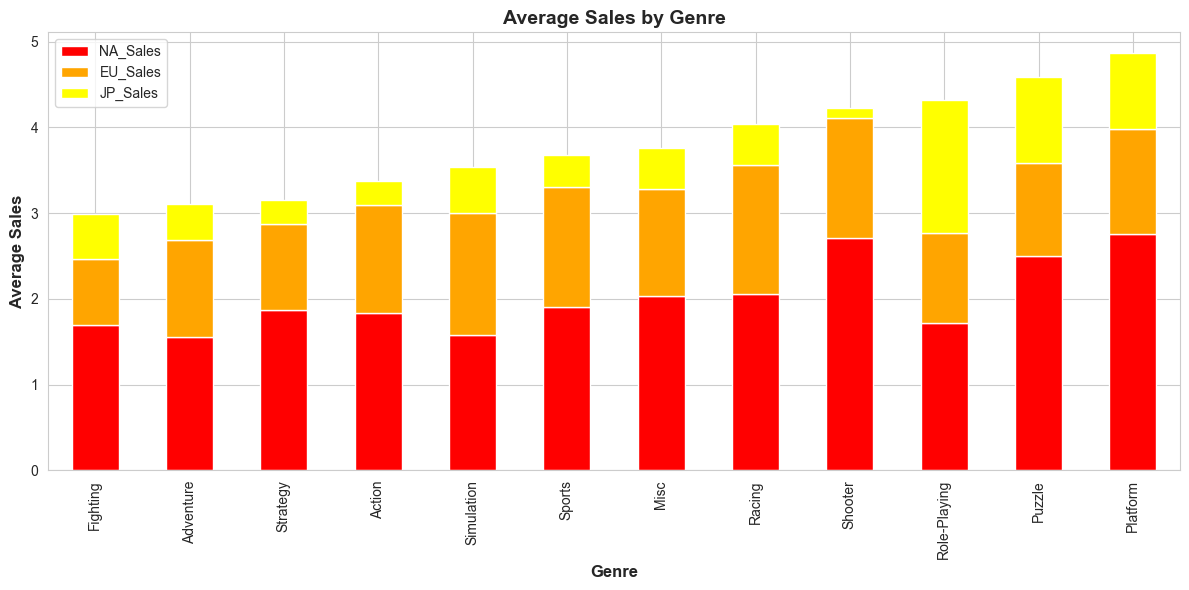

In [24]:
average_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].mean()
average_genre['Total_Average'] = average_genre[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum(axis=1)
average_genre.sort_values('Total_Average', ascending=True, inplace=True)

average_genre[['NA_Sales', 'EU_Sales', 'JP_Sales']].plot(kind = 'bar', 
           stacked=True,
           figsize= (12,6),
           color=['red', 'orange', 'yellow'])

plt.title("Average Sales by Genre", fontsize = 14, fontweight = 'bold')
plt.xlabel("Genre", fontsize = 12, fontweight = 'bold')
plt.ylabel("Average Sales", fontsize = 12, fontweight = 'bold')

plt.tight_layout()

Berdasarkan grafik diatas, Genre **Platform** menjadi Genre dengan rata-rata penjualan tertinggi sebesar 4,87 juta unit per gamenya, diikuti oleh genre **Puzzle dan Role-Playing**. Dari ketiga genre dengan rata-rata penjualan tertinggi ini, terlihat bahwa penggemar game lebih menyukai game dengan gameplay santai dan menyenangkan seperti yang ditawarkan oleh game-game **platform, puzzle, dan role-playing**. Meskipun dari segi grafis tidak terlalu istimewa, gameplay yang disajikan oleh ketiga genre ini berhasil menarik perhatian para pemain. Hal ini wajar mengingat semua game tersebut merupakan produk keluaran sebelum tahun 2000, ketika teknologi grafis masih terbatas.

Berikut merupakan daftar game dari top 3 genre dengan rata-rata penjualan tertinggi:

In [25]:
top_game_average = df[df['Genre'].isin(['Platform', 'Puzzle', 'Role-Playing'])]

top_game_average

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Total_Sales,Category
Rank,,,,,,,,,,
240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,4.45,Pre-2000 Games
90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,7.73,Pre-2000 Games
702,Mario Bros.,NES,1983,Platform,Nintendo,0.51,0.12,1.63,2.26,Pre-2000 Games
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,39.47,Pre-2000 Games
994,Kid Icarus,NES,1986,Platform,Nintendo,0.53,0.12,1.09,1.74,Pre-2000 Games
...,...,...,...,...,...,...,...,...,...,...
931,LittleBigPlanet 3,PS4,2014,Platform,Sony Computer Entertainment,0.64,0.92,0.01,1.57,Post-2000 Games
430,Super Mario Maker,WiiU,2015,Platform,Nintendo,1.18,0.87,0.93,2.98,Post-2000 Games
110,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,5.86,Post-2000 Games


# Analisis 7: Total Penjualan Game Berdasarkan Region North America, Europe, Japan

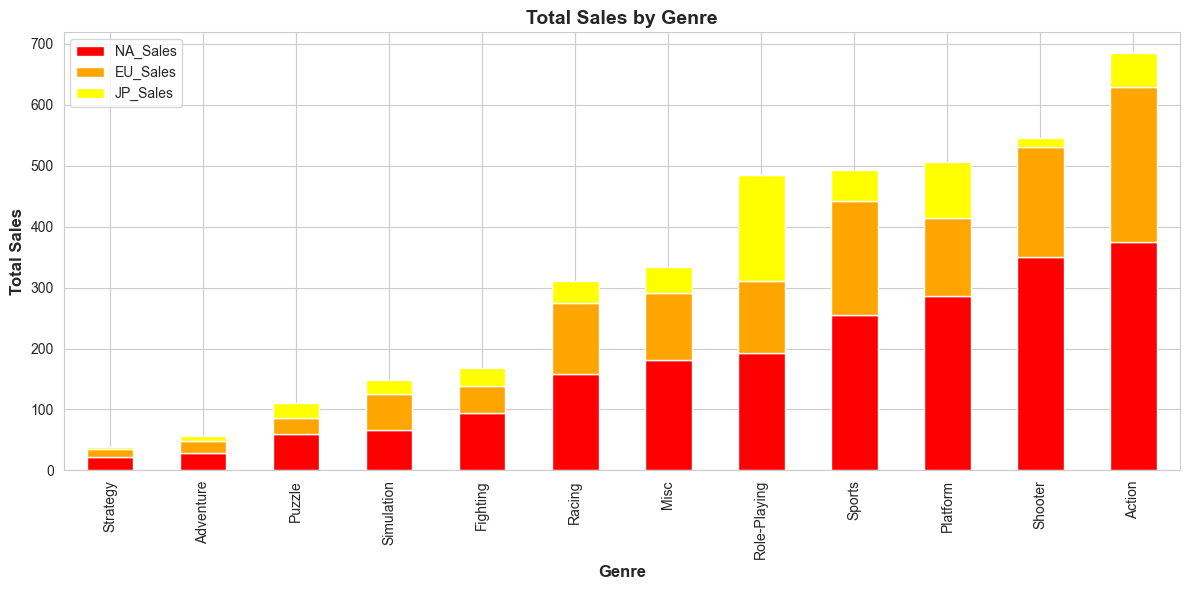

In [26]:
sum_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
sum_genre['Total_Sales'] = sum_genre[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum(axis=1)
sum_genre.sort_values('Total_Sales', ascending=True, inplace=True)

sum_genre[['NA_Sales', 'EU_Sales', 'JP_Sales']].plot(kind = 'bar', 
           stacked=True,
           figsize= (12,6),
           color=['red', 'orange', 'yellow'])

plt.title("Total Sales by Genre", fontsize = 14, fontweight = 'bold')
plt.xlabel("Genre", fontsize = 12, fontweight = 'bold')
plt.ylabel("Total Sales", fontsize = 12, fontweight = 'bold')

plt.tight_layout()

Jika dilihat dari total penjualan berdasarkan genre, genre **Action** menjadi genre game yang paling banyak terjual, diikuti oleh genre **Shooter** yang menjadi genre paling banyak terjual kedua. Genre **Platform** yang sebelumnya memiliki rata-rata penjualan tertinggi per game, berada di posisi ketiga dalam total penjualan secara keseluruhan. Data ini menunjukkan bahwa meskipun game **Platform** memiliki performa penjualan rata-rata lebih tinggi per game, jumlah game **Action** yang dirilis lebih banyak sehingga mendominasi total penjualan.

# Analisis Penjualan Game berdasarkan Genre dan Region

Berdasarkan kedua grafik, terlihat pola penjualan yang berbeda antara rata-rata penjualan per game dan total penjualan keseluruhan. **North America (NA)** mendominasi hampir semua genre dengan kontribusi penjualan tertinggi, terutama untuk genre Action dan Shooter yang menjadi pemimpin dalam total penjualan. **Europe (EU)** menunjukkan minat yang cukup konsisten di berbagai genre dengan preferensi lebih tinggi pada genre Racing dan Sports dibandingkan proporsi penjualan genre tersebut di Jepang. Sementara **Japan (JP)** memiliki preferensi unik dengan kontribusi signifikan pada genre Role-Playing dan menunjukkan minat yang lebih rendah pada genre Shooter. Perbedaan preferensi regional ini mencerminkan keragaman budaya gaming di ketiga wilayah, Region **North America** yang lebih menyukai game berorientasi aksi, Region **Europe** yang memiliki selera lebih seimbang, dan **Japan** yang lebih condong pada game dengan cerita kompleks dan pengembangan karakter.

# Analisis 9: Distribusi Penjualan Game 

#### Menemukan tahun dengan Total Penjualan terbanyak

In [27]:
top_year_sales = df.groupby('Year')['Total_Sales'].sum().reset_index()
top_year_sales.sort_values('Total_Sales', ascending=False, inplace=True)
top_year_sales.head()

,Year,Total_Sales
29,2009,273.62
30,2010,263.05
26,2006,259.37
27,2007,247.79
28,2008,237.69


Tahun dengan total penjualan tertinggi adalah tahun 2009

In [28]:
sales_2009 = df[df['Year'] == 2009]
sales_2009 = sales_2009.sort_values('Total_Sales', ascending=False)

sales_2009.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Total_Sales,Category
Rank,,,,,,,,,,
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,30.04,Post-2000 Games
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,26.35,Post-2000 Games
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,20.21,Post-2000 Games
37,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,12.23,Post-2000 Games
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,11.13,Post-2000 Games


#### Menemukan tahun dengan Total Game terbanyak

In [29]:
game_per_year = df.groupby('Year').size().reset_index(name='Total_Games').sort_values('Total_Games', ascending=False)
game_per_year.head()

,Year,Total_Games
27,2007,71
28,2008,68
30,2010,67
29,2009,60
31,2011,55


Tahun dengan total game rilis terbanyak adalah tahun 2007

In [30]:
sales_2007 = df[df['Year'] == 2007].sort_values('Total_Sales', ascending=False)
sales_2007.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Total_Sales,Category
Rank,,,,,,,,,,
14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,20.57,Post-2000 Games
44,Halo 3,X360,2007,Shooter,Microsoft Game Studios,7.97,2.83,0.13,10.93,Post-2000 Games
49,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.16,3.40,1.20,10.76,Post-2000 Games
71,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5.91,2.38,0.13,8.42,Post-2000 Games
75,Mario Party DS,DS,2007,Misc,Nintendo,4.46,1.88,1.98,8.32,Post-2000 Games


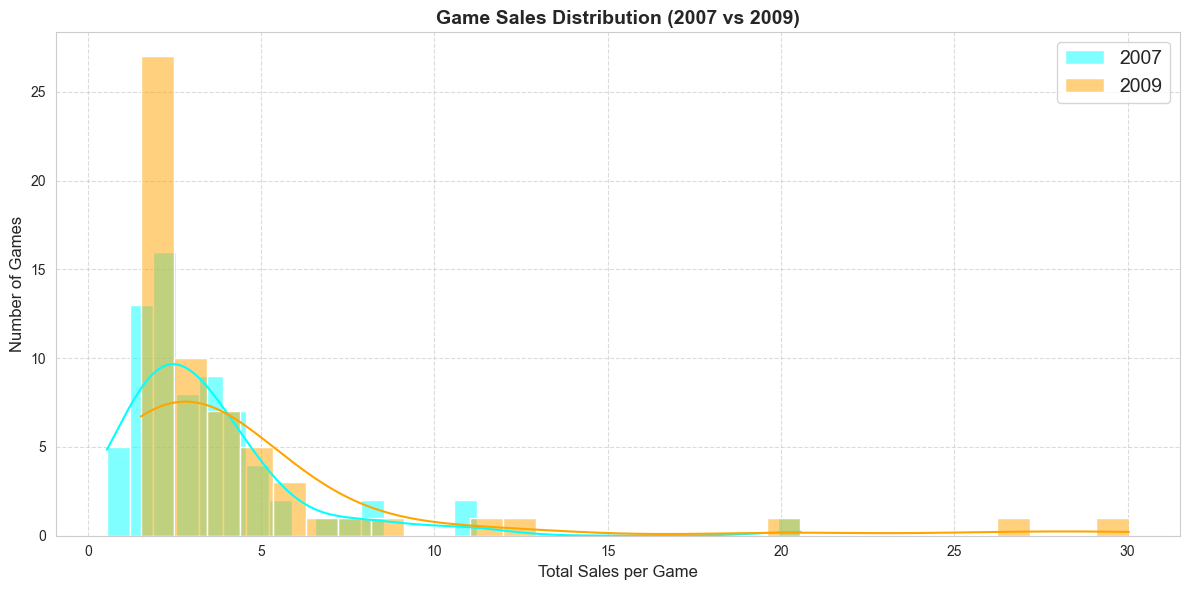

In [31]:
plt.figure(figsize=(12, 6))

# Histogram dengan perbaikan tambahan
sns.histplot(sales_2007['Total_Sales'], bins=30, color='cyan', label='2007', kde=True, line_kws={'color':'blue'})
sns.histplot(sales_2009['Total_Sales'], bins=30, color='orange', label='2009', kde=True, line_kws={'color':'darkorange'})

# Judul dan Label dengan ukuran lebih besar
plt.xlabel('Total Sales per Game', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.title('Game Sales Distribution (2007 vs 2009)', fontsize=14, fontweight = 'bold')

# Tambahkan grid dan legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=14)

plt.tight_layout()

Berdasarkan histogram perbandingan distribusi penjualan game antara tahun 2007 dan 2009, terlihat perubahan signifikan dalam pola industri game. Tahun 2007 menunjukkan kurva yang lebih lebar dengan jumlah game yang dirilis lebih banyak, tetapi mayoritas game memiliki penjualan yang relatif rendah (1-5 juta unit per game). Sementara itu, tahun 2009 menunjukkan fenomena yang berbeda, dengan jumlah game yang dirilis lebih sedikit namun distribusinya lebih condong ke arah kanan (penjualan lebih tinggi). Hal ini ditunjukkan oleh bar oranye yang dominan pada rentang 1-3 juta unit dan adanya beberapa game **blockbuster** yang mencapai penjualan di atas 25 juta unit. Perubahan ini menggambarkan pergeseran strategi industri game dari pendekatan **kuantitas** pada 2007 menjadi fokus pada **kualitas** di tahun 2009, dengan perusahaan lebih memilih untuk merilis game yang lebih sedikit tetapi dengan potensi penjualan yang lebih tinggi.